In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#1단계: 데이터 준비
df = pd.read_csv("./datas/auto-mpg.csv", header=None)
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
0    398 non-null float64
1    398 non-null int64
2    398 non-null float64
3    398 non-null object
4    398 non-null float64
5    398 non-null float64
6    398 non-null int64
7    398 non-null int64
8    398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


In [3]:
#컬럼 이름 (변수, 특성 이름) 지정
df.columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']
print(df.head())
print('\n')

pd.set_option('display.max_columns', 10)
print(df.head())
print('\n')

#2단계: 데이터 탐색
print(df.info())
print('\n')
print(df.describe())
print('\n')
print(df['horsepower'].unique())  

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0  

In [4]:
# horsepower열에서 ?를 NaN값으로 대체
df['horsepower'].replace('?', np.nan, inplace=True)
    
#horsepower 열이 NaN인 행을 삭제
df.dropna(subset=['horsepower'], axis=0, inplace=True)

#문자열 데이터를 실수형 데이터로 변환
df['horsepower'] = df['horsepower'].astype('float')
print(df.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

In [5]:
# 3단계 : 분석에 사용할 특성(열, 변수) 선택 (연비, 실린더, 마력, 중력)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
print(ndf.head())

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


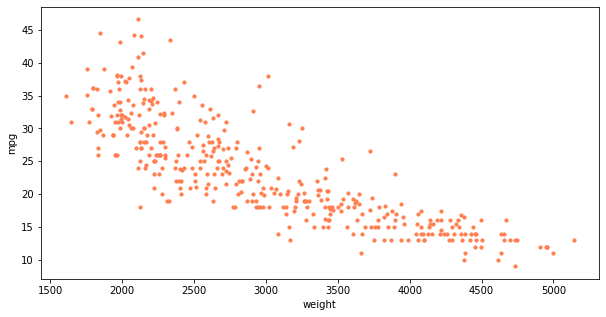

In [6]:
# 종속변수(mpg)와 다른 변수('cylinders', 'horsepower', 'weight')간의 선형관계여부 확인
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10,5))
plt.show()
plt.close()

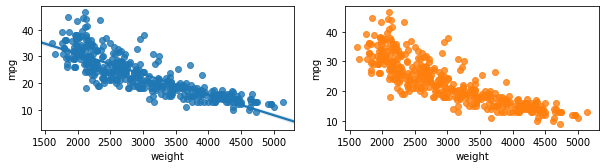

In [7]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1) # 회귀선을 기본적으로 표시해줌
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)

plt.show()
plt.close()

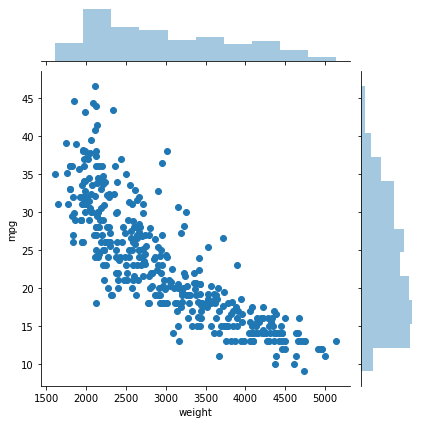

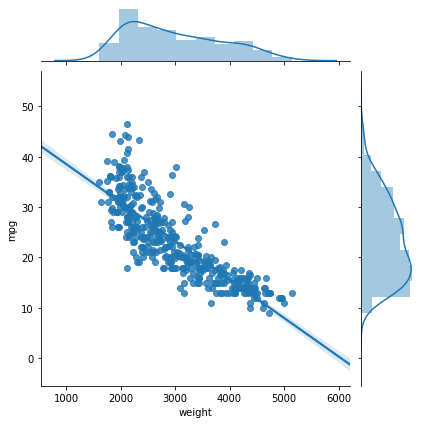

In [8]:
sns.jointplot(x='weight', y='mpg', data=ndf)
sns.jointplot(x='weight', y='mpg', data=ndf, kind='reg')  #회귀선 표시
plt.show()
plt.close()

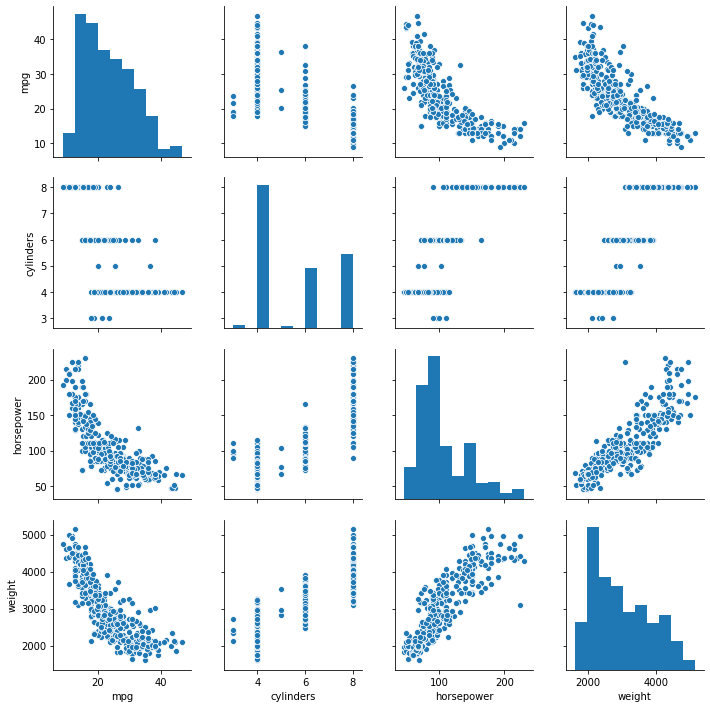

In [9]:
sns.pairplot(ndf)
plt.show()
plt.close()

In [10]:
# 4단계 : 훈련 데이터와 테스트 데이터로 분리

X= ndf[['weight']]   #독립변수 X : 무게
Y=ndf['mpg']    #종속변수 Y : 연비

# train data 와 test data를 7:3 비율로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)  #랜덤 추출값 10

print('train data  개수 :', len(X_train))
print('test data  개수 :', len(X_test))


train data  개수 : 274
test data  개수 : 118


0.6822458558299325
기울기 a :  [-0.00775343]
절편 b :  46.710366257280086


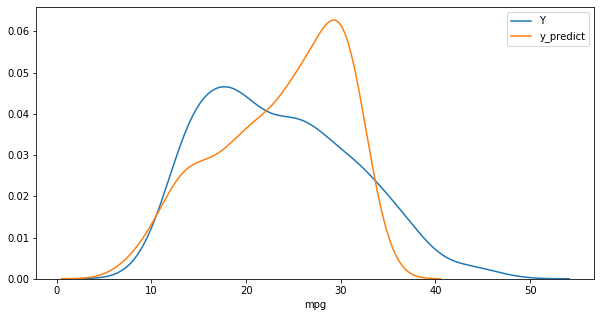

In [11]:
# 5단계 : 단순회귀분석 - 학습
from sklearn.linear_model import LinearRegression  #선형회귀 라이브러리의 선형회귀분석 모듈 

lr = LinearRegression()  #단순 선형회귀분석 객체 생성

lr.fit(X_train, Y_train)  #학습

r_square = lr.score(X_test, Y_test) # 결정 계수 계산
print(r_square )    #결정 계수 : 0.6822458558299325

print('기울기 a : ', lr.coef_)
print('절편 b : ', lr.intercept_)

#기울기 a :  [-0.00775343]
# 절편 b :  46.710366257280086

y_predict =lr.predict(X)   #독립변수에 대한 예측된 종속변수값 

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(Y, hist=False, label='Y')
ax2 = sns.distplot(y_predict, hist=False, label='y_predict', ax=ax1)
plt.show()
plt.close()